In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_fontja
import numpy as np
from scipy import signal

acce_file_path = './PDR_1/Accelerometer.csv'
gyro_file_path = './PDR_1/Gyroscope.csv'

acce_data = pd.read_csv(acce_file_path,names=['timestamp','x','y','z'], header=0)
gyro_data = pd.read_csv(gyro_file_path,names=['timestamp','x','y','z'], header=0)

# 2sから9sまでのデータに絞る
acce_data = acce_data[(acce_data['timestamp'] >= 2.0) & (acce_data['timestamp'] <= 9.0)]
gyro_data = gyro_data[(gyro_data['timestamp'] >= 2.0) & (gyro_data['timestamp'] <= 9.0)]

In [25]:
acce_data['norm'] = (acce_data['y']**2 + acce_data['z']**2)**0.5
gyro_data['angle'] = np.cumsum(gyro_data['x']) / (len(gyro_data) / (gyro_data['timestamp'].iloc[-1] - gyro_data['timestamp'].iloc[0]))
gyro_data['low_angle'] = gyro_data['angle'].rolling(window=100, center=True).mean()
gyro_data['low_x'] = gyro_data['x'].rolling(window=30).mean()
gyro_data['angle_y'] = np.cumsum(gyro_data['y']) /  (len(gyro_data) / (gyro_data['timestamp'].iloc[-1] - gyro_data['timestamp'].iloc[0]))
gyro_data['low_angle_y'] = gyro_data['angle_y'].rolling(window=200, center=True).mean()
gyro_data['angle_z'] = np.cumsum(gyro_data['z']) /  (len(gyro_data) / (gyro_data['timestamp'].iloc[-1] - gyro_data['timestamp'].iloc[0]))
gyro_data['low_angle_z'] = gyro_data['angle_z'].rolling(window=200, center=True).mean()

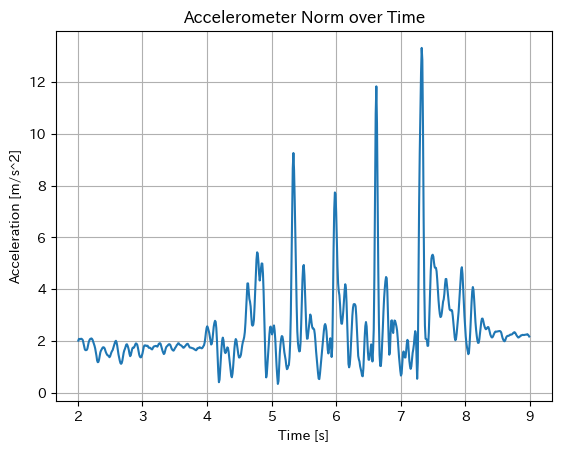

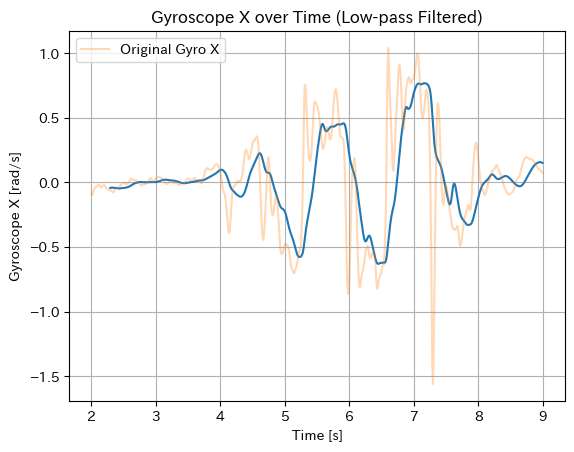

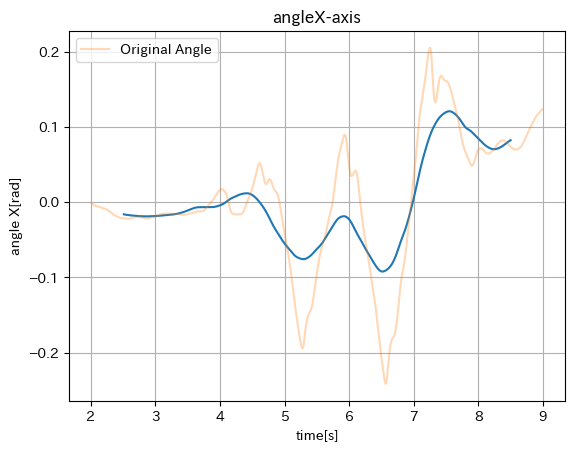

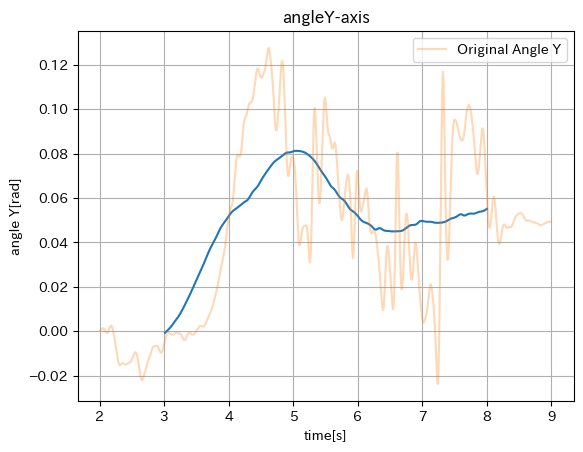

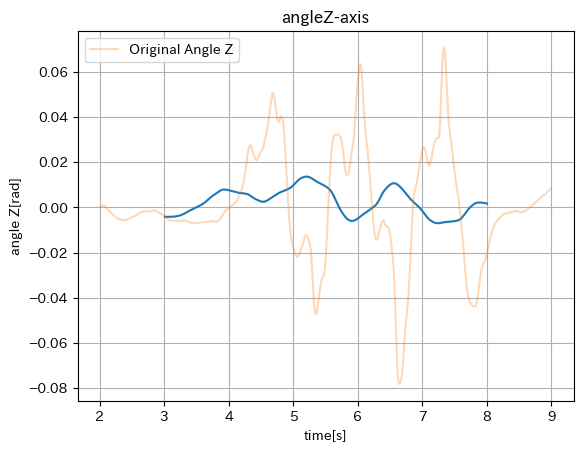

Text(0, 0.5, 'gyro [rad/s]')

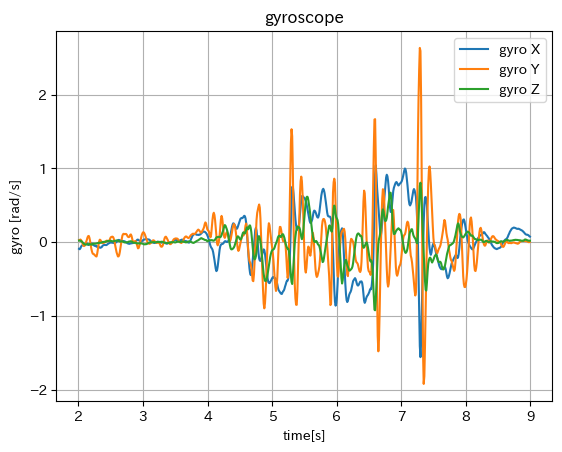

In [26]:
plt.plot(acce_data['timestamp'], acce_data['norm'])
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Accelerometer Norm over Time')
plt.grid()
plt.show()

plt.plot(gyro_data['timestamp'], gyro_data['low_x'])
plt.plot(gyro_data['timestamp'], gyro_data['x'], alpha=0.3, label='Original Gyro X')
plt.xlabel('Time [s]')
plt.ylabel('Gyroscope X [rad/s]')
plt.title('Gyroscope X over Time (Low-pass Filtered)')
plt.legend()
plt.grid()
plt.show()

plt.plot(gyro_data["timestamp"], gyro_data["low_angle"])
plt.plot(gyro_data['timestamp'], gyro_data['angle'], alpha=0.3, label='Original Angle')
plt.title("angleX-axis")
plt.xlabel("time[s]")
plt.ylabel("angle X[rad]")
plt.legend()
plt.grid()
plt.show()

plt.plot(gyro_data["timestamp"], gyro_data["low_angle_y"])
plt.plot(gyro_data['timestamp'], gyro_data['angle_y'], alpha=0.3
, label='Original Angle Y')
plt.title("angleY-axis")
plt.xlabel("time[s]")
plt.ylabel("angle Y[rad]")
plt.legend()
plt.grid()
plt.show()

plt.plot(gyro_data["timestamp"], gyro_data["low_angle_z"])
plt.plot(gyro_data['timestamp'], gyro_data['angle_z'], alpha=0.3
, label='Original Angle Z')
plt.title("angleZ-axis")
plt.xlabel("time[s]")
plt.ylabel("angle Z[rad]")
plt.legend()
plt.grid()
plt.show()

plt.plot(gyro_data["timestamp"], gyro_data["x"], label='gyro X')
plt.plot(gyro_data['timestamp'],gyro_data['y'], label='gyro Y')
plt.plot(gyro_data['timestamp'],gyro_data['z'], label='gyro Z')
plt.grid()
plt.legend()
plt.title("gyroscope")
plt.xlabel("time[s]")
plt.ylabel("gyro [rad/s]")

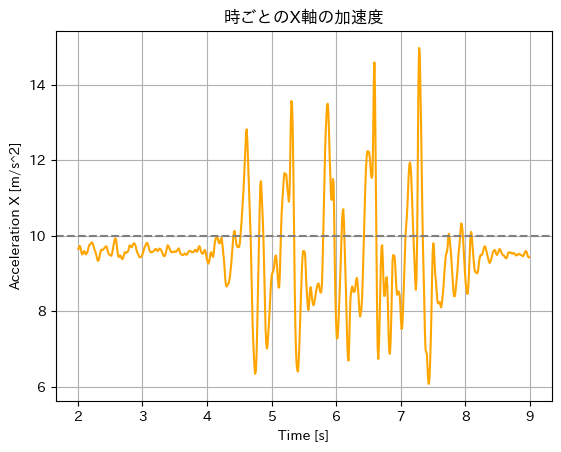

In [27]:
plt.plot(acce_data['timestamp'], acce_data['x'], color='orange')
plt.axhline(10.0, color='gray', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration X [m/s^2]')
plt.title('時ごとのX軸の加速度')
plt.grid()
plt.show()

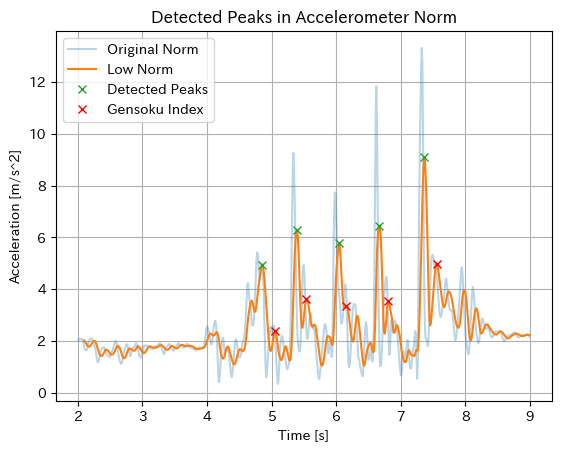

In [28]:
acce_data['low_norm'] = acce_data['norm'].rolling(window=10).mean()
peak,_ = signal.find_peaks(acce_data['low_norm'], height=4, distance=20)

gensoku_index = [303, 352, 413, 478, 554]

#peakを点にしてプロット
plt.plot(acce_data['timestamp'], acce_data['norm'], alpha=0.3, label='Original Norm')
plt.plot(acce_data['timestamp'], acce_data['low_norm'], label='Low Norm')
plt.plot(acce_data['timestamp'].iloc[peak], acce_data['low_norm'].iloc[peak], "x", label='Detected Peaks')
plt.plot(acce_data['timestamp'].iloc[gensoku_index], acce_data['low_norm'].iloc[gensoku_index], "x", color='red', label='Gensoku Index')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Detected Peaks in Accelerometer Norm')
plt.legend()
plt.grid()

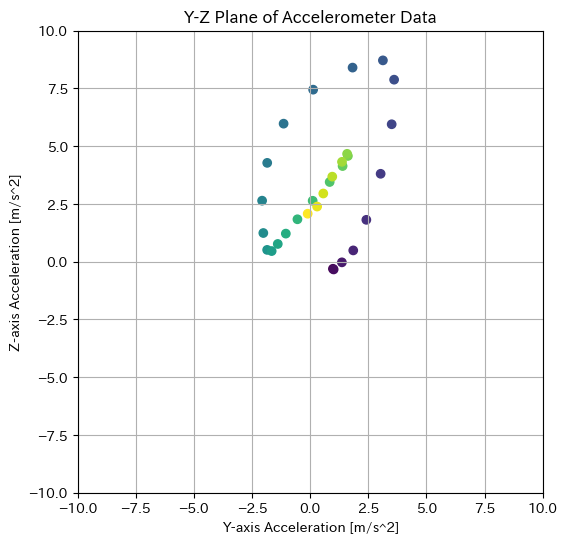

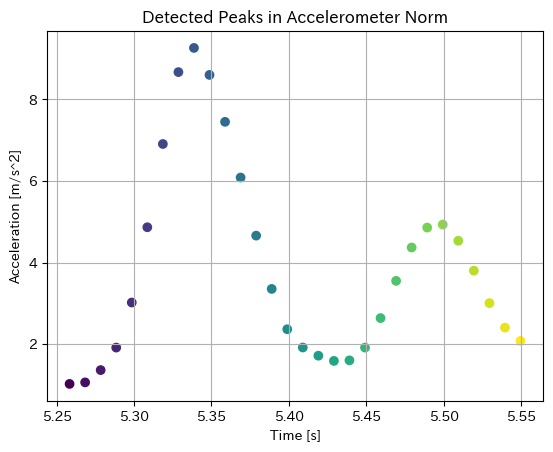

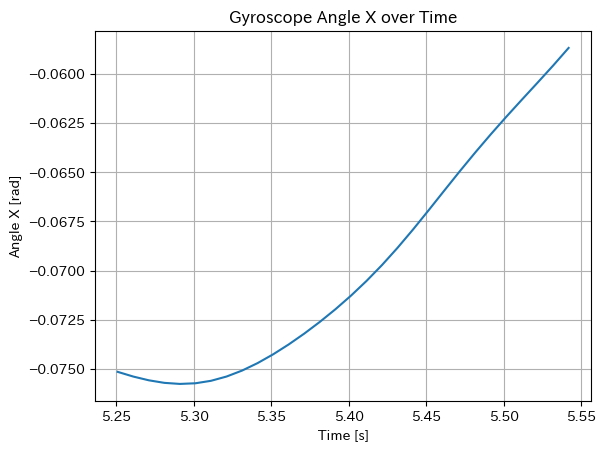

In [29]:
step_df = acce_data[(acce_data['timestamp']>= 5.25) & (acce_data['timestamp']<=5.55)]
step_df_gyro = gyro_data[(gyro_data['timestamp']>= 5.25) & (gyro_data['timestamp']<=5.55)]
# indexをリセット
step_df = step_df.reset_index(drop=True)
step_df_gyro = step_df_gyro.reset_index(drop=True)
plt.figure(figsize=(6,6))
plt.scatter(step_df['y'],step_df['z'], c = step_df['timestamp'], cmap='viridis')
plt.xlabel('Y-axis Acceleration [m/s^2]')
plt.ylabel('Z-axis Acceleration [m/s^2]')
plt.title('Y-Z Plane of Accelerometer Data')
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.grid()
plt.show()

plt.scatter(step_df['timestamp'], step_df['norm'], c = step_df['timestamp'], cmap='viridis')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Detected Peaks in Accelerometer Norm')
plt.grid()
plt.show()

plt.plot(step_df_gyro['timestamp'], step_df_gyro['low_angle'])
plt.xlabel('Time [s]')
plt.ylabel('Angle X [rad]')
plt.title('Gyroscope Angle X over Time')
plt.grid()
plt.show()

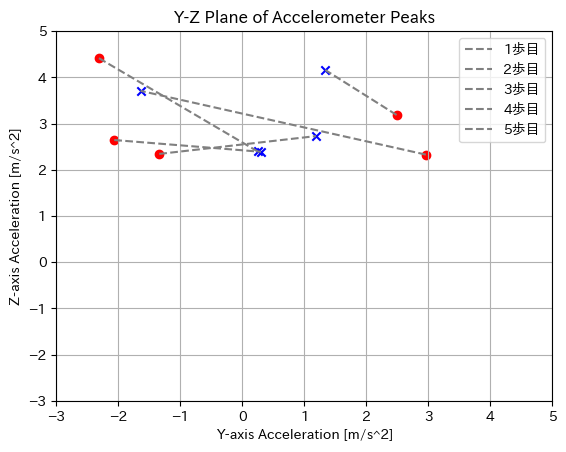

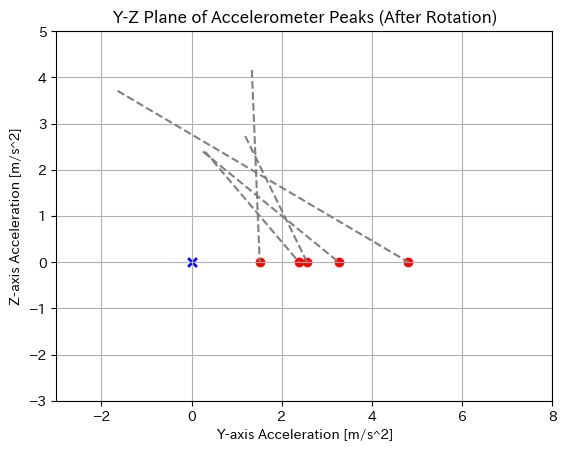

In [30]:
# 加速の山の極大と減速の山の極大の値をそれぞれ持ってくる
peak_acce_kasoku = [] # 加速の山の極大のy,z軸の加速度を保存
for i in peak:
	peak_acce_kasoku.append(
		{
			'peak_y': acce_data['y'].iloc[i],
			'peak_z': acce_data['z'].iloc[i],
		}
	)

peak_acce_gensoku = [] # 減速の山の極大のy,z軸の加速度を保存
for i in gensoku_index:
	peak_acce_gensoku.append(
		{
			'peak_y': acce_data['y'].iloc[i],
			'peak_z': acce_data['z'].iloc[i],
		}
	)
for i in range(len(peak_acce_kasoku)):
	plt.scatter(peak_acce_kasoku[i]['peak_y'], peak_acce_kasoku[i]['peak_z'], color='red', marker='o')
	plt.scatter(peak_acce_gensoku[i]['peak_y'], peak_acce_gensoku[i]['peak_z'], color='blue', marker='x')	
	plt.plot((peak_acce_kasoku[i]['peak_y'], peak_acce_gensoku[i]['peak_y']),(peak_acce_kasoku[i]['peak_z'], peak_acce_gensoku[i]['peak_z']), '--', color='gray',label='{}歩目'.format(i+1) )
plt.xlabel('Y-axis Acceleration [m/s^2]')
plt.ylabel('Z-axis Acceleration [m/s^2]')
plt.title('Y-Z Plane of Accelerometer Peaks')
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.grid()
plt.legend()
plt.show()

plt.title('Y-Z Plane of Accelerometer Peaks (After Rotation)')
plt.xlabel('Y-axis Acceleration [m/s^2]')
plt.ylabel('Z-axis Acceleration [m/s^2]')
plt.xlim(-3, 8)
plt.ylim(-3, 5)
plt.grid()
# --- 右のグラフ: 補正（回転）後のベクトル ---
for i in range(len(peak_acce_kasoku)):
    # 始点と終点をNumpy配列に変換
    start_point = np.array([peak_acce_gensoku[i]['peak_y'], peak_acce_gensoku[i]['peak_z']])
    end_point = np.array([peak_acce_kasoku[i]['peak_y'], peak_acce_kasoku[i]['peak_z']])
    
    # 始点から終点へのベクトルを計算
    vector = end_point - start_point
    
    # ベクトルをZ軸正方向（前方）に向けるための回転角度を計算
    angle_to_rotate = -np.arctan2(vector[1], vector[0])# Z軸正方向に合わせるための角度
    
    # 回転行列を適用してベクトルを回転させる
    cos_a = np.cos(angle_to_rotate)
    sin_a = np.sin(angle_to_rotate)
    rotated_y = vector[0] * cos_a - vector[1] * sin_a
    rotated_z = vector[0] * sin_a + vector[1] * cos_a
    # 回転後のベクトルを原点(0,0)からプロット
    plt.scatter(0, 0, color='blue', marker='x') # 始点を原点に
    plt.scatter(rotated_y, rotated_z, color='red', marker='o') # 回転後の終点
    plt.plot([peak_acce_gensoku[i]['peak_y'], rotated_y], [peak_acce_gensoku[i]['peak_z'], rotated_z], '--', color='gray', label=f'{i+1}歩目')


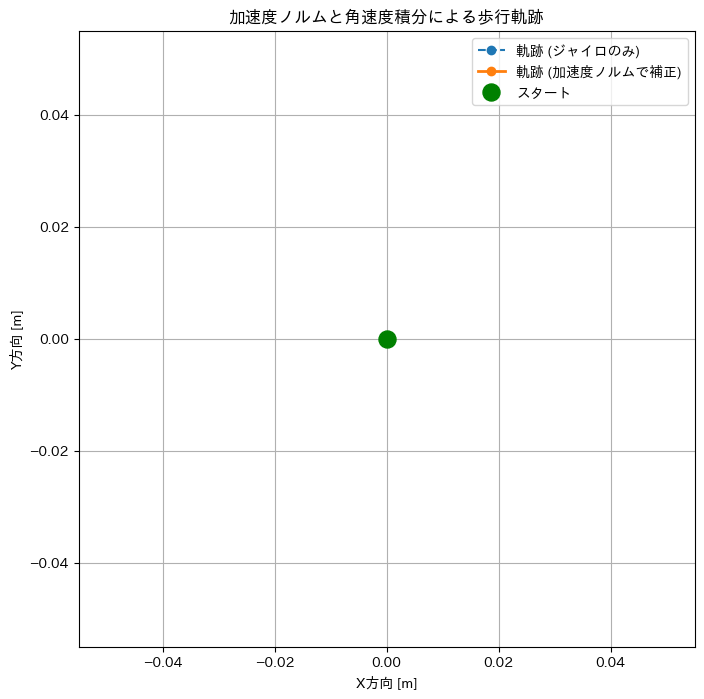

In [31]:
# --- 1. サンプルデータの作成 ---
# この部分はご自身のデータに置き換えてください
dt = 0.01
time = np.arange(0, 12, dt)
# U字に歩くシミュレーション
gyro_x = np.zeros_like(time)
gyro_x[(time > 3.5) & (time < 4.5)] = -np.pi / 2 # 右に90度
gyro_x[(time > 7.5) & (time < 8.5)] = -np.pi / 2 # さらに右に90度

acc_vertical = (np.sin(time * np.pi * 2.5) ** 10) * 6
acce_data_full = pd.DataFrame({
    'timestamp': time,
    'low_x': 9.81 + acc_vertical, # 鉛直方向の加速度
    'y': acc_vertical * np.cos(np.deg2rad(10)), # Y,Zは常に同じパターン
    'z': acc_vertical * np.sin(np.deg2rad(10)),
})
gyro_data_full = pd.DataFrame({'gyro_x': gyro_x})

# ステップの区切りを検出 (鉛直方向加速度の谷)
step_boundaries, _ = signal.find_peaks(-acce_data_full['low_x'], height=1, distance=30)
# (↑ここまでサンプルデータ)

# --- 2. 軌跡計算の準備 ---
# 角速度を積分し、各時刻での体の向きを計算しておく
gyro_heading = (gyro_data['x'] * dt).cumsum()

# --- 3. センサーフュージョンによる歩行軌跡の計算 ---
step_length = 0.7
point_fused = [[0, 0]]
point_gyro_only = [[0, 0]]

# ステップごとにループ
for i in range(len(step_boundaries) - 1):
    start_idx = step_boundaries[i]
    end_idx = step_boundaries[i+1]
    
    # a. このステップ区間のデータを取得
    step_data = acce_data.iloc[start_idx:end_idx]
    
    # b. 加速度の大きさ（ノルム）を計算
    step_norm = np.sqrt(step_data['y']**2 + step_data['z']**2)
    
    # c. ノルムのピークを2つ見つける
    # prominenceはピークの際立ち度。ノイズを避けるために重要
    norm_peaks, _ = signal.find_peaks(step_norm, prominence=1, distance=10)
    
    # ピークが2つ見つからない場合はスキップ
    if len(norm_peaks) < 2:
        continue
    
    # d. 2つのピークを時間に沿ってソートし、加速・減速ピークを特定
    # インデックスはstep_data内での相対位置なので、絶対位置に変換
    sorted_peak_indices = sorted(norm_peaks, key=lambda p: step_norm.iloc[p], reverse=True)[:2]
    
    # 時間的に早い方が加速、遅い方が減速
    peak_idx_accel = min(sorted_peak_indices) + start_idx
    peak_idx_decel = max(sorted_peak_indices) + start_idx
    
    # e. 加速・減速ピーク時の(y,z)座標を取得
    accel_point = acce_data.iloc[peak_idx_accel][['y', 'z']].values
    decel_point = acce_data.iloc[peak_idx_decel][['y', 'z']].values
    
    # f. 進行方向ベクトルと補正角度を計算
    vector = accel_point - decel_point # 減速 -> 加速
    accel_correction_angle = -np.arctan2(vector[1], vector[0])
    
    # g. ジャイロによる向きを取得
    mid_time_index = (start_idx + end_idx) // 2
    heading_by_gyro = gyro_heading[mid_time_index]
    
    # h. 2つの情報を統合（フュージョン）
    final_heading = heading_by_gyro + accel_correction_angle
    
    # i. 新しい座標を計算
    x = step_length * np.cos(final_heading) + point_fused[-1][0]
    y = step_length * np.sin(final_heading) + point_fused[-1][1]
    point_fused.append([x, y])
    
    # 比較用のジャイロのみ版
    x_gyro = step_length * np.cos(heading_by_gyro) + point_gyro_only[-1][0]
    y_gyro = step_length * np.sin(heading_by_gyro) + point_gyro_only[-1][1]
    point_gyro_only.append([x_gyro, y_gyro])


point_fused = pd.DataFrame(data=point_fused, columns=['x', 'y'])
point_gyro_only = pd.DataFrame(data=point_gyro_only, columns=['x', 'y'])

# --- 4. 描画 ---
plt.figure(figsize=(10, 8))
plt.plot(point_gyro_only['x'], point_gyro_only['y'], 'o--', label='軌跡 (ジャイロのみ)', zorder=1)
plt.plot(point_fused['x'], point_fused['y'], 'o-', label='軌跡 (加速度ノルムで補正)', zorder=2, linewidth=2)
plt.scatter(point_fused['x'].iloc[0], point_fused['y'].iloc[0], c='green', s=150, label='スタート', zorder=5)

plt.gca().set_aspect('equal', adjustable='box')
plt.title('加速度ノルムと角速度積分による歩行軌跡')
plt.xlabel('X方向 [m]')
plt.ylabel('Y方向 [m]')
plt.grid()
plt.legend()
plt.show()

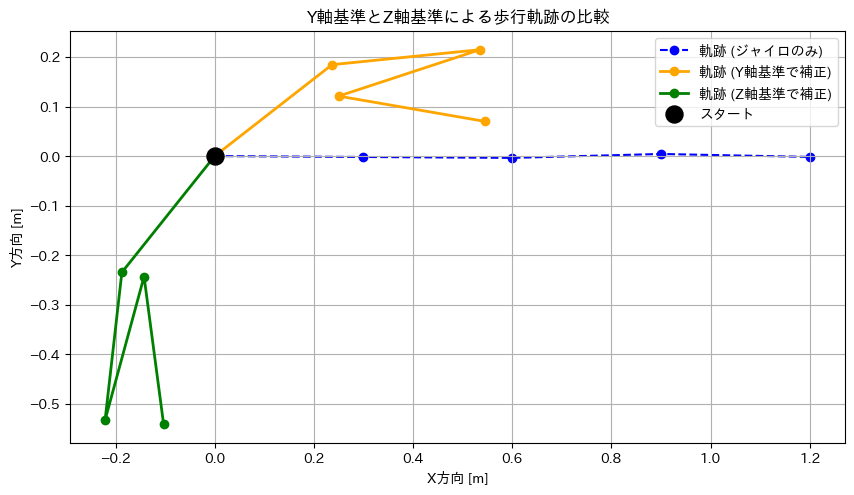

In [32]:
# --- 2. 軌跡計算に必要なデータを準備 ---
# 加速ピークと減速ピークの座標を取得
peak_acce_kasoku = [{'peak_y': acce_data['y'].iloc[i], 'peak_z': acce_data['z'].iloc[i]} for i in peak]
# 加速ピークの数に減速ピークの数を合わせる
gensoku_index = gensoku_index[:len(peak)]
peak_acce_gensoku = [{'peak_y': acce_data['y'].iloc[i], 'peak_z': acce_data['z'].iloc[i]} for i in gensoku_index]

# サンプリング間隔dtを計算
dt = np.mean(np.diff(gyro_data['timestamp']))

# 角速度を積分し、各時刻での体の向き(ジャイロによる推定)を計算しておく
gyro_heading = (gyro_data['z'] * dt).cumsum()


# --- 3. 新しい仕様に基づく歩行軌跡の計算 ---
point_gyro_only = [[0, 0]]
point_fused_Y = [[0, 0]] # Y軸基準の軌跡
point_fused_Z = [[0, 0]] # Z軸基準の軌跡
step_length = 0.3
for i in range(1, len(peak_acce_kasoku)):
    prev_kasoku_point = np.array(list(peak_acce_kasoku[i-1].values()))
    current_kasoku_point = np.array(list(peak_acce_kasoku[i].values()))

    mid_time_index = (peak[i-1] + peak[i]) // 2
    heading_by_gyro = gyro_heading[mid_time_index]
    
    kasoku_point = np.array(list(peak_acce_kasoku[i-1].values()))
    gensoku_point = np.array(list(peak_acce_gensoku[i-1].values()))
    vector = gensoku_point - kasoku_point
    
    # a. Y軸基準の補正角度を計算
    accel_correction_angle_Y = -np.arctan2(vector[1], vector[0])
    
    # b. Z軸基準の補正角度を計算 ★★★ここが新しい部分★★★
    # arctan2の引数を入れ替えることで、Z軸からの角度を計算
    accel_correction_angle_Z = -np.arctan2(vector[0], vector[1])
    
    # 2つの情報をそれぞれ統合
    final_heading_Y = heading_by_gyro + accel_correction_angle_Y
    final_heading_Z = heading_by_gyro + accel_correction_angle_Z
    
    # 新しい座標を計算
    x_gyro = step_length * np.cos(heading_by_gyro) + point_gyro_only[-1][0]
    y_gyro = step_length * np.sin(heading_by_gyro) + point_gyro_only[-1][1]
    point_gyro_only.append([x_gyro, y_gyro])

    x_fused_Y = step_length * np.cos(final_heading_Y) + point_fused_Y[-1][0]
    y_fused_Y = step_length * np.sin(final_heading_Y) + point_fused_Y[-1][1]
    point_fused_Y.append([x_fused_Y, y_fused_Y])

    x_fused_Z = step_length * np.cos(final_heading_Z) + point_fused_Z[-1][0]
    y_fused_Z = step_length * np.sin(final_heading_Z) + point_fused_Z[-1][1]
    point_fused_Z.append([x_fused_Z, y_fused_Z])

point_gyro_only = pd.DataFrame(data=point_gyro_only, columns=['x', 'y'])
point_fused_Y = pd.DataFrame(data=point_fused_Y, columns=['x', 'y'])
point_fused_Z = pd.DataFrame(data=point_fused_Z, columns=['x', 'y'])


# --- 4. 描画 ---
plt.figure(figsize=(10, 8))
plt.plot(point_gyro_only['x'], point_gyro_only['y'], 'o--', color='blue', label='軌跡 (ジャイロのみ)', zorder=1)
plt.plot(point_fused_Y['x'], point_fused_Y['y'], 'o-', color='orange', label='軌跡 (Y軸基準で補正)', zorder=2, linewidth=2)
plt.plot(point_fused_Z['x'], point_fused_Z['y'], 'o-', color='green', label='軌跡 (Z軸基準で補正)', zorder=2, linewidth=2)
plt.scatter(point_fused_Y['x'].iloc[0], point_fused_Y['y'].iloc[0], c='black', s=150, label='スタート', zorder=5)

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Y軸基準とZ軸基準による歩行軌跡の比較')
plt.xlabel('X方向 [m]')
plt.ylabel('Y方向 [m]')
plt.grid()
plt.legend()
plt.show()


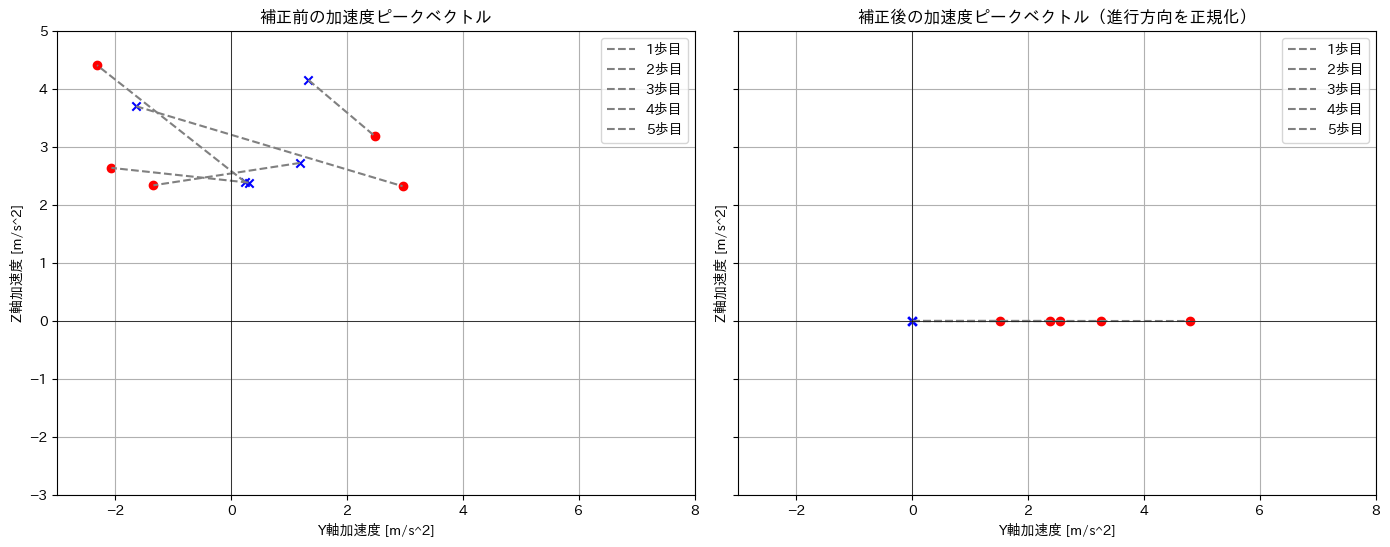

In [33]:
# グラフ描画エリアを左右２つに分割
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

# --- 左のグラフ: 元のベクトル ---
axes[0].set_title('補正前の加速度ピークベクトル')
for i in range(len(peak_acce_kasoku)):
    start_y, end_y = peak_acce_gensoku[i]['peak_y'], peak_acce_kasoku[i]['peak_y']
    start_z, end_z = peak_acce_gensoku[i]['peak_z'], peak_acce_kasoku[i]['peak_z']
    
    # 始点（減速ピーク）と終点（加速ピーク）をプロット
    axes[0].scatter(start_y, start_z, color='blue', marker='x')
    axes[0].scatter(end_y, end_z, color='red', marker='o')
    
    # 2点を線で結ぶ
    axes[0].plot([start_y, end_y], [start_z, end_z], '--', color='gray', label=f'{i+1}歩目')


# --- 右のグラフ: 補正（回転）後のベクトル ---
axes[1].set_title('補正後の加速度ピークベクトル（進行方向を正規化）')
for i in range(len(peak_acce_kasoku)):
    # 始点と終点をNumpy配列に変換
    start_point = np.array([peak_acce_gensoku[i]['peak_y'], peak_acce_gensoku[i]['peak_z']])
    end_point = np.array([peak_acce_kasoku[i]['peak_y'], peak_acce_kasoku[i]['peak_z']])
    
    # 始点から終点へのベクトルを計算
    vector = end_point - start_point
    
    # ベクトルをY軸正方向（前方）に向けるための回転角度を計算
    angle_to_rotate = -np.arctan2(vector[1], vector[0])
    
    # 回転行列を適用してベクトルを回転させる
    cos_a = np.cos(angle_to_rotate)
    sin_a = np.sin(angle_to_rotate)
    rotated_y = vector[0] * cos_a - vector[1] * sin_a
    rotated_z = vector[0] * sin_a + vector[1] * cos_a
    
    # 回転後のベクトルを原点(0,0)からプロット
    axes[1].scatter(0, 0, color='blue', marker='x') # 始点を原点に
    axes[1].scatter(rotated_y, rotated_z, color='red', marker='o') # 回転後の終点
    axes[1].plot([0, rotated_y], [0, rotated_z], '--', color='gray', label=f'{i+1}歩目')


# --- グラフ全体の体裁を整える ---
for ax in axes:
    ax.set_xlabel('Y軸加速度 [m/s^2]')
    ax.set_ylabel('Z軸加速度 [m/s^2]')
    ax.set_xlim(-3, 8)
    ax.set_ylim(-3, 5)
    ax.grid(True)
    ax.legend()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal') # アスペクト比を1:1に

plt.tight_layout()
plt.show()

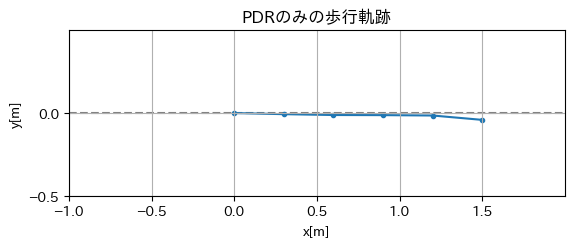

In [34]:
step = 0.3
point = [[0, 0]]


# ステップから歩行軌跡を計算
for p in peak:
    x = step * np.cos(gyro_data['low_angle'][p]*1.2) + point[-1][0]
    y = step * np.sin(gyro_data['low_angle'][p]*1.2) + point[-1][1]

    point.append([x, y])

point = pd.DataFrame(data=point, columns=['x', 'y'])

point['x'] = point['x'] - point['x'][0]
point['y'] = point['y'] - point['y'][0]

# 描画
size = ((-1,2), (-0.5, 0.5))

plt.plot(point['x'], point['y'], '.-', label='推定', zorder=1)

# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')

plt.title('PDRのみの歩行軌跡')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.xticks(np.arange(size[0][0], size[0][1], 0.5))
plt.yticks(np.arange(size[1][0], size[1][1], 0.5))
plt.hlines(0, size[0][0], size[0][1], colors='gray', linestyles='--', zorder=0)
plt.xlim(size[0][0], size[0][1])
plt.ylim(size[1][0], size[1][1])

plt.grid()
plt.show()